## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# Commented out as goolge colab comes with these libraries pre-installed with the latest version
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
# libraries for data manipulation and numerical operation
import numpy as np
import pandas as pd

# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# libraries for metrics
from sklearn.metrics import(
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)



In [4]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [5]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# loading the data
df = pd.read_csv('/content/drive/MyDrive/AI_ML_PGP/Projects/PersonalLoanCampaignModel/Loan_Modelling.csv')
df.head() # checking dataset is loaded

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

In [7]:
df.head() # checking the first 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.tail() # checking the last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [9]:
df.shape # check the shape of the data

(5000, 14)

In [10]:
df.info() # summary information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
df.describe().T # summary statistics of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
df.isnull().sum().sum() # check for missing values

0

In [13]:
df.duplicated().sum() # check for duplicate values

0

In [14]:
df['ID'].nunique() # check for unique values for ID column

5000

In [15]:
df[df['Experience'] < 0]['Experience'].count() # check for negative values in Experience column

52

### **Observations**
* Dataset has 5000 rows and 14 columns
* Data types for all columns are numeric
* `ID` column is the unique identifier and this can be dropped
* `Age`, `Experience`, `Income`, `CCAvg` and `Mortgage` columns are numeric columns and represent respective numeric values for these features
* `Family` represents discreet numerical values which we can use for categorical analysis
* Though the data type for `ZIPCode` is int64, it is a categorical feature.
* `Education` is a categorical feature of ordinal type
* `Securities_Account`, `CD_Account`, `Online` and `CreditCard` columns are the numerical representation of the respective categorical features. They are mapped to 1 and 0 for Yes and No values respectively.
* `Personal_Loan` is our target variable and it has following classes:<br/>
&nbsp; &nbsp; &nbsp; &nbsp; **1:** Customer accepted the loan in the last campaign <br/>
&nbsp; &nbsp; &nbsp; &nbsp; **0:** Customer didn't accept the loan in the last campaign<br/>
Our goal is to build the machine learning model, so we can predict the outcome of `Personal_Loan` for future campaign, identify the important features and identify the customer segments for targeting.
* Dataset doesn't contain any duplicate rows
* Dataset doesn't contain any missing value
* `Experience` column in the dataset contains 52 negative entries, these are more likely data entry error. We will convert these entries to postive number.

### Creating a copy of the data and dropping the ID column and coverting negative experience values to positive numbers

In [16]:
data = df.copy() # creating a copy of the data
data.drop(columns='ID', inplace=True) # dropping the ID column
data.head() # checking the first 5 rows of the data

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [17]:
data['Experience'] = data['Experience'].apply(lambda x: abs(x)) # converting negative experience values to positive numbers
data[data['Experience'] < 0]['Experience'].count()

0

In [18]:
# statistical summary of data after data cleansing
data['Experience'].describe().T

,Experience
count,5000.000000
mean,20.134600
std,11.415189
min,0.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,43.000000


* After converting negative values to positive, the statistical summary for the experience column is almost unchanged apart from the minimum experience of customers is now 0.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
**Ans:** The distribution of mortgage is highly right skewed. There are outliers in the distribution. Though 69.24% customers have no mortgage, the average mortgage debt is around \\$56.4k, and, the median of mortgage debt is 0. 25% customers have mortgage debt of \\$101k or more. 5.82% customers have mortgage debt of \\$252.5k or more which are showed as outliers in the boxplot distribution.
From the 30.76% customers who have mortgage, Around 82.4% of those customers have a mortgage debt above \\$100k.
2. How many customers have credit cards?
**Ans:** 4894 customers have credit cards
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

In [19]:
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'] # numerical columns
cat_cols = ['Family','Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode'] # categorical columns

In [20]:
def histplot_and_boxplot(data, col):
  fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6), sharex= True, gridspec_kw={"height_ratios":(0.30,0.70)})
  fig.suptitle(f'Distribution of {col}')
  sns.boxplot(data = data, x = col, ax = ax1, showmeans = True)
  sns.histplot(data = data, x = col, ax = ax2, kde = False)
  ax2.axvline(data[col].mean(), color = 'green', linestyle = '--')
  ax2.axvline(data[col].median(), color = 'red', linestyle = '--')
  plt.tight_layout()
  plt.show()

def labelled_countplot(data, col):
  ax = sns.countplot(data = data, x = col)
  for p in ax.patches:
    count = p.get_height()
    percentage = f'{round((count/data.shape[0])*100, 2)}%'
    ax.annotate(percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
            textcoords='offset points')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.show()

**Univariate Analysis of Numerical data**

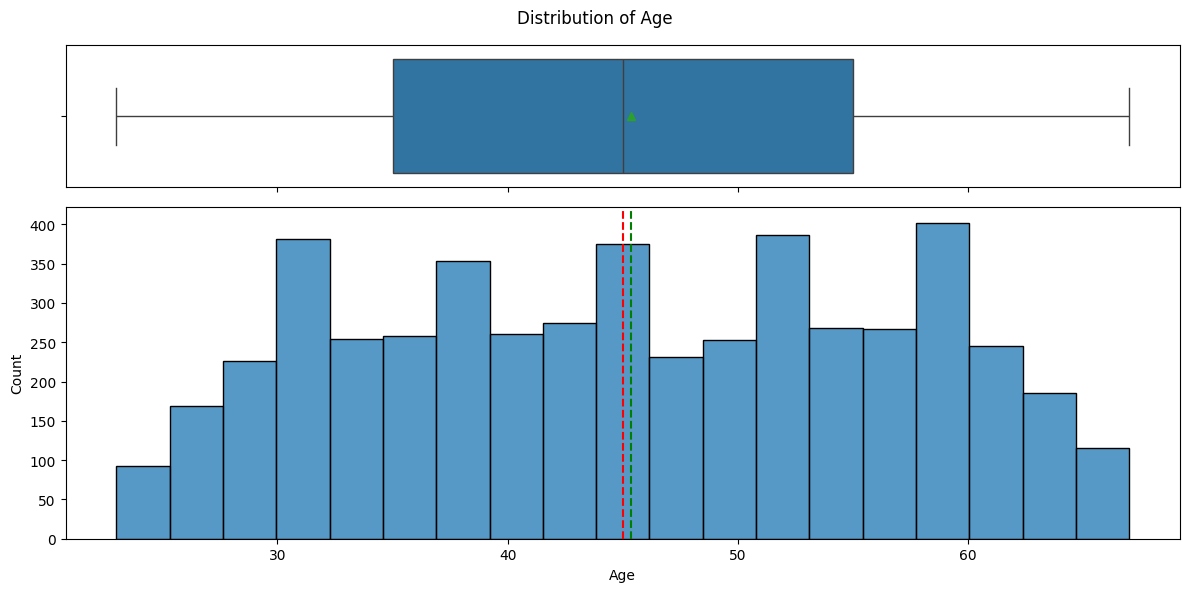

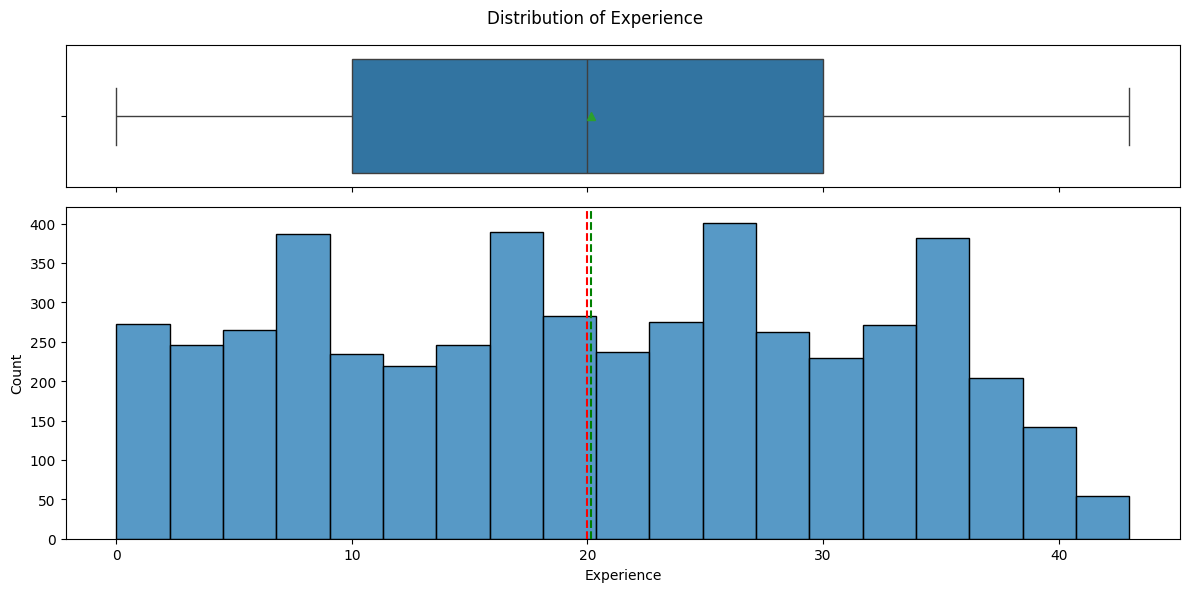

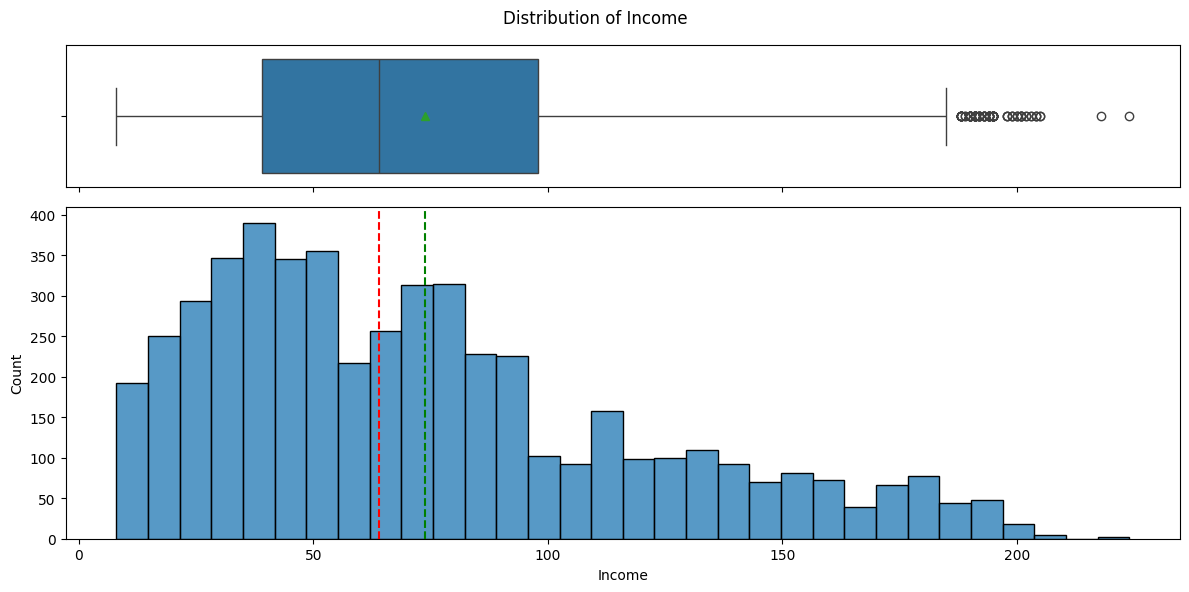

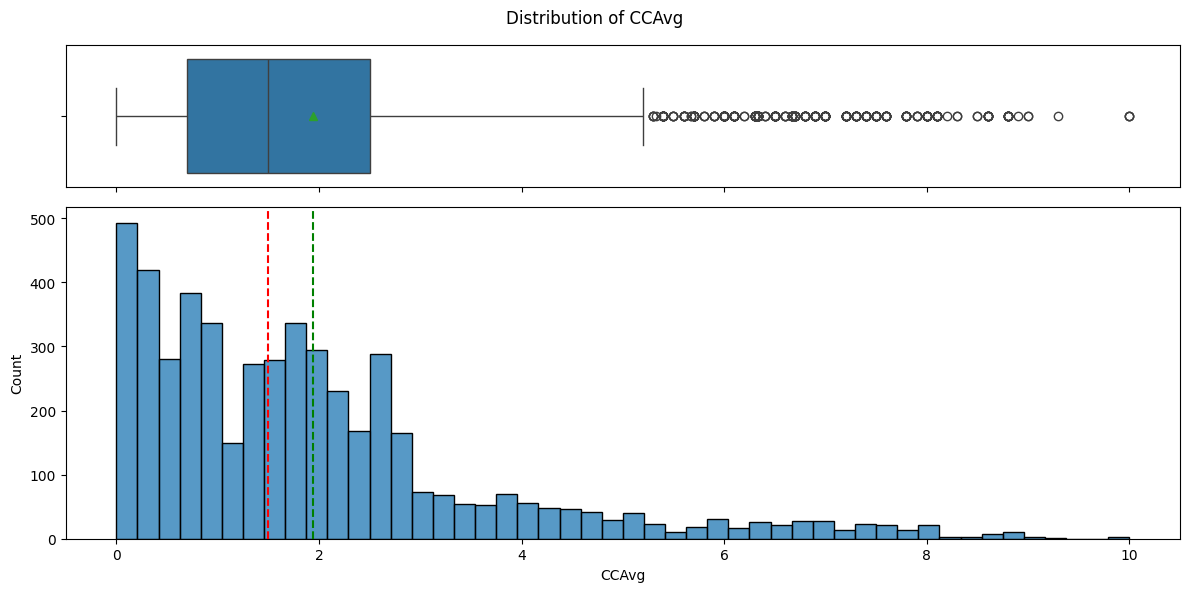

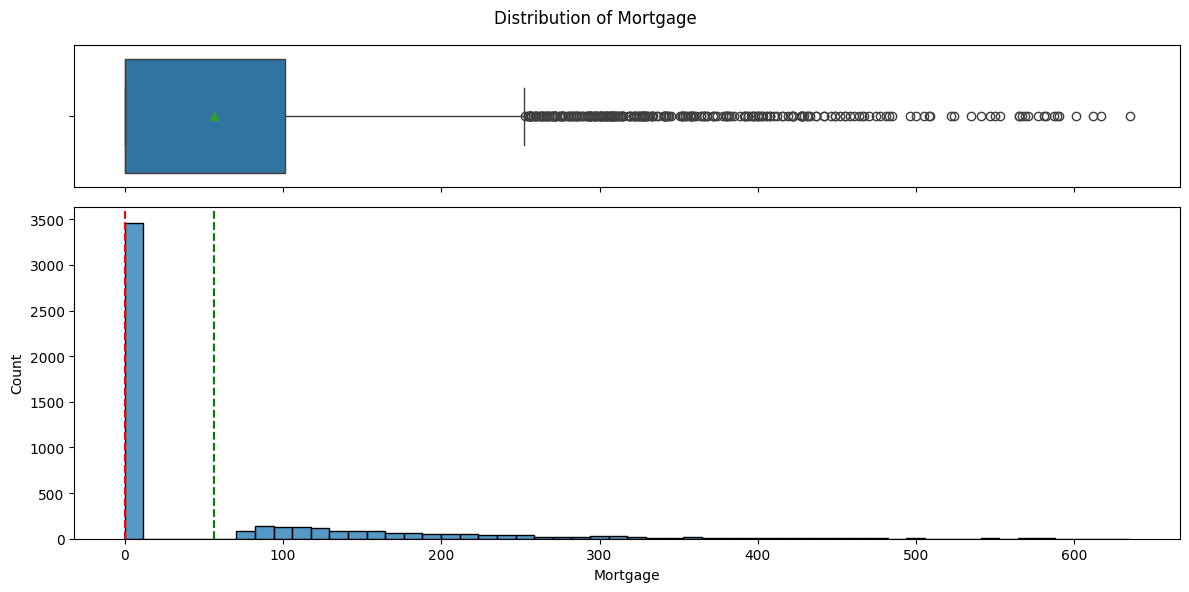

In [21]:
for col in num_cols:
  histplot_and_boxplot(data, col)

* There are significant number of customers who don't have any mortgage and some customers have high mortgage debt. Let's analyse the mortgage distribution further.
* There are customers who don't have any avg. monthly spending on credit card and there are some outliers in the distribution of average monthly credit card spending. We will also analyse this distribution further.

In [22]:
# customers with no mortgage
no_mortgage = data[data['Mortgage'] == 0]['Mortgage'].count()
Percentage_of_Customers_with_No_Mortgage = round((no_mortgage/data.shape[0])*100, 2)
pd.DataFrame([no_mortgage, Percentage_of_Customers_with_No_Mortgage], index = ['No Mortgage', 'Percentage']).T

,No Mortgage,Percentage
0,3462.0,69.24


In [23]:
# Customers with high mortgage debt
IQR = data['Mortgage'].quantile(0.75) - data['Mortgage'].quantile(0.25)
high_mortgage = data[data['Mortgage'] >= (data['Mortgage'].quantile(0.75) + 1.5*IQR)]['Mortgage'].count()
high_mortgage_percentage = round((high_mortgage/data.shape[0])*100, 2)
print("Upper whisker value:", data['Mortgage'].quantile(0.75) + 1.5*IQR)
pd.DataFrame([high_mortgage, high_mortgage_percentage], index = ['Count of High Mortgage', 'Percentage']).T

Upper whisker value: 252.5


,Count of High Mortgage,Percentage
0,291.0,5.82


In [24]:
# customers percentage with mortgage debt above $100k among the customers who have mortgage
mortgage_debt_100k = data[data['Mortgage'] >= 100]['Mortgage'].count()
mortgage_debt_percentage_100k = round((mortgage_debt_100k/1538)*100, 2)
pd.DataFrame([mortgage_debt_100k, mortgage_debt_percentage_100k], index = ['Mortgage holders with $100k or more', 'Percentage(Among mortgage all holders)']).T

,Mortgage holders with $100k or more,Percentage(Among mortgage all holders)
0,1268.0,82.44


In [25]:
# cutomers with no credit card
no_credit_card = data[data['CCAvg'] == 0]['CCAvg'].count()
no_credit_card_percentage = round((no_credit_card/data.shape[0])*100, 2)
pd.DataFrame([no_credit_card, no_credit_card_percentage], index = ['No Credit Card', 'Percentage']).T

,No Credit Card,Percentage
0,106.0,2.12


**Univariate analysis of categorical data**

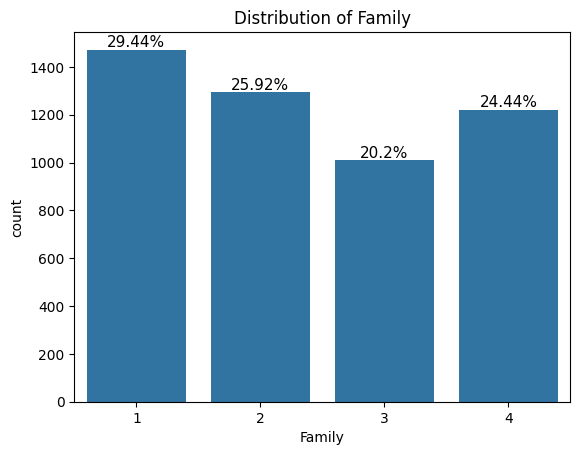

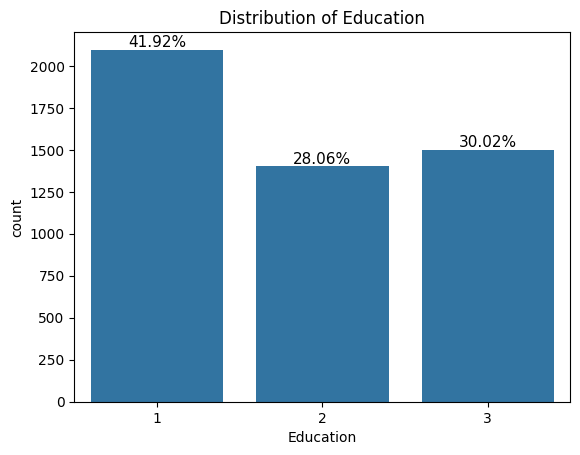

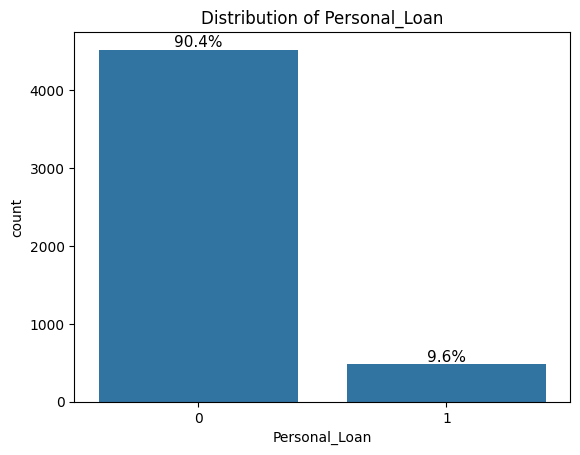

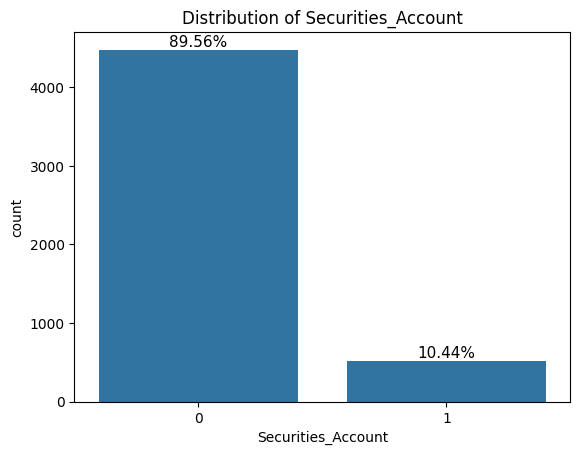

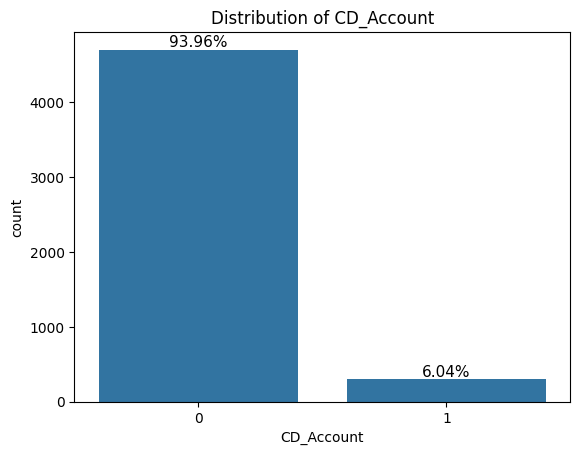

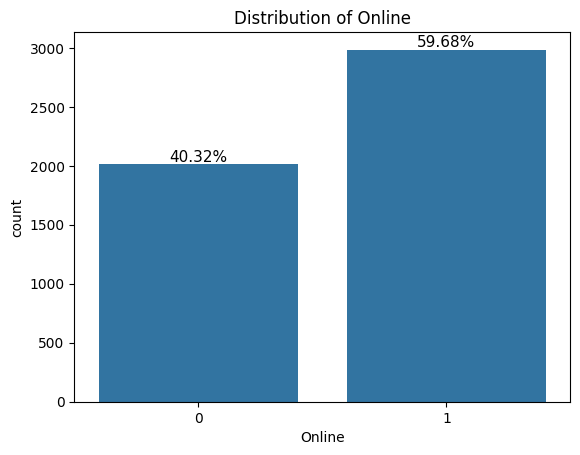

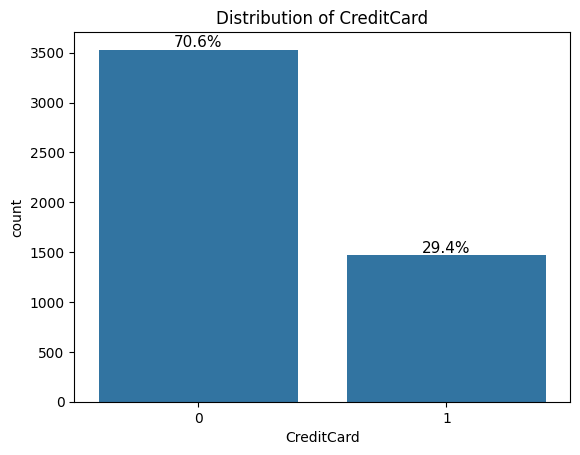

In [26]:
for col in cat_cols:
  if col != 'ZIPCode':
    labelled_countplot(data, col)

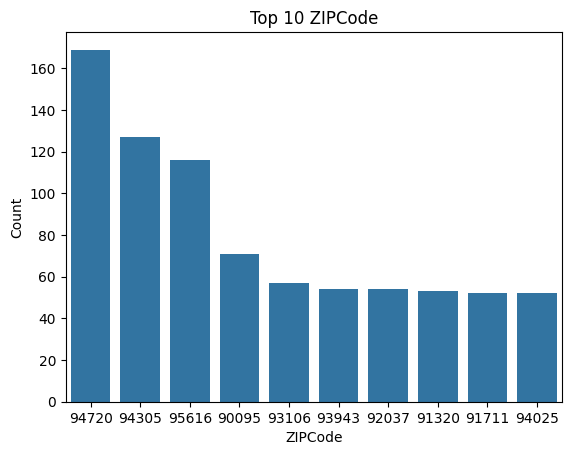

In [27]:
# top 10 zipcode
top10_zipcode = data['ZIPCode'].value_counts().head(10).reset_index()
top10_zipcode.columns = ['ZIPCode', 'Count']
sns.barplot(data= top10_zipcode, x = 'ZIPCode', y = 'Count'
            , order=top10_zipcode.sort_values('Count', ascending=False)['ZIPCode']
)
plt.title('Top 10 ZIPCode')
plt.xlabel('ZIPCode')
plt.ylabel('Count')
plt.show()

#### Observation
* Both mean and median age of the customers is around 45. 75% of the customer is either 35 years old or older than 35 years.
* 75% of customers have 10 years or more professional experience. The average professional experience of the customers is around 20 years which also happens to be the median professional experience.
* The average income of the customers is higher than the median income due to some customers' very high income(outliers in the data).
* Some customers' credit card average spending per month is over \\$5k though 75% of the customers' average spending on credit card is less than or equal \\$2.5k. There are 106 customers who either doesn't have any credit card or they just don't use it.
* 69.24% customers have no mortgage. 5.82% customers have mortgage debt of \\$252.5k or more.
* The family size for 29.4% customers is one, 24.4% customers have family size 4
* Education level for 41.9% customers is undergrad, around 30% customers have advanced professional education level
* 9.4% customers in the dataset have personal loan with AllLife bank
* 10.4% customers have securities account with the bank
* Around 6% customers have certificate deposit account
* Around 59% customers do internet banking
* Around 29% customers use credit card issued by other banks
* Top 5 ZIPcode areas in descending order are 94720, 94305, 95616, 90095 and 93106

### Multivariate analysis

**Multivariate analysis:** (Numerical features vs `Personal_Loan`)

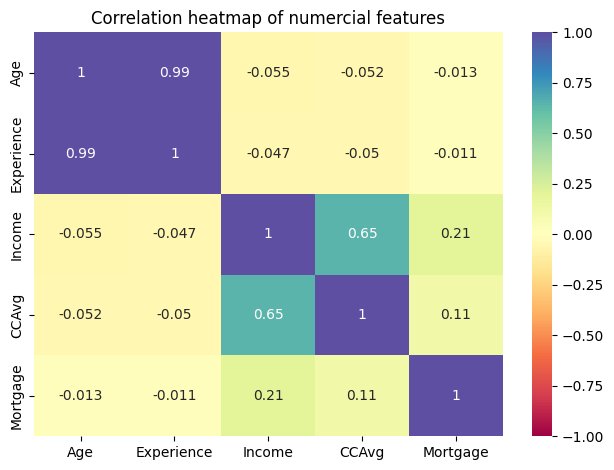

In [28]:
# heatmap
sns.heatmap(data[num_cols].corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
plt.title('Correlation heatmap of numercial features')
plt.tight_layout()
plt.show()

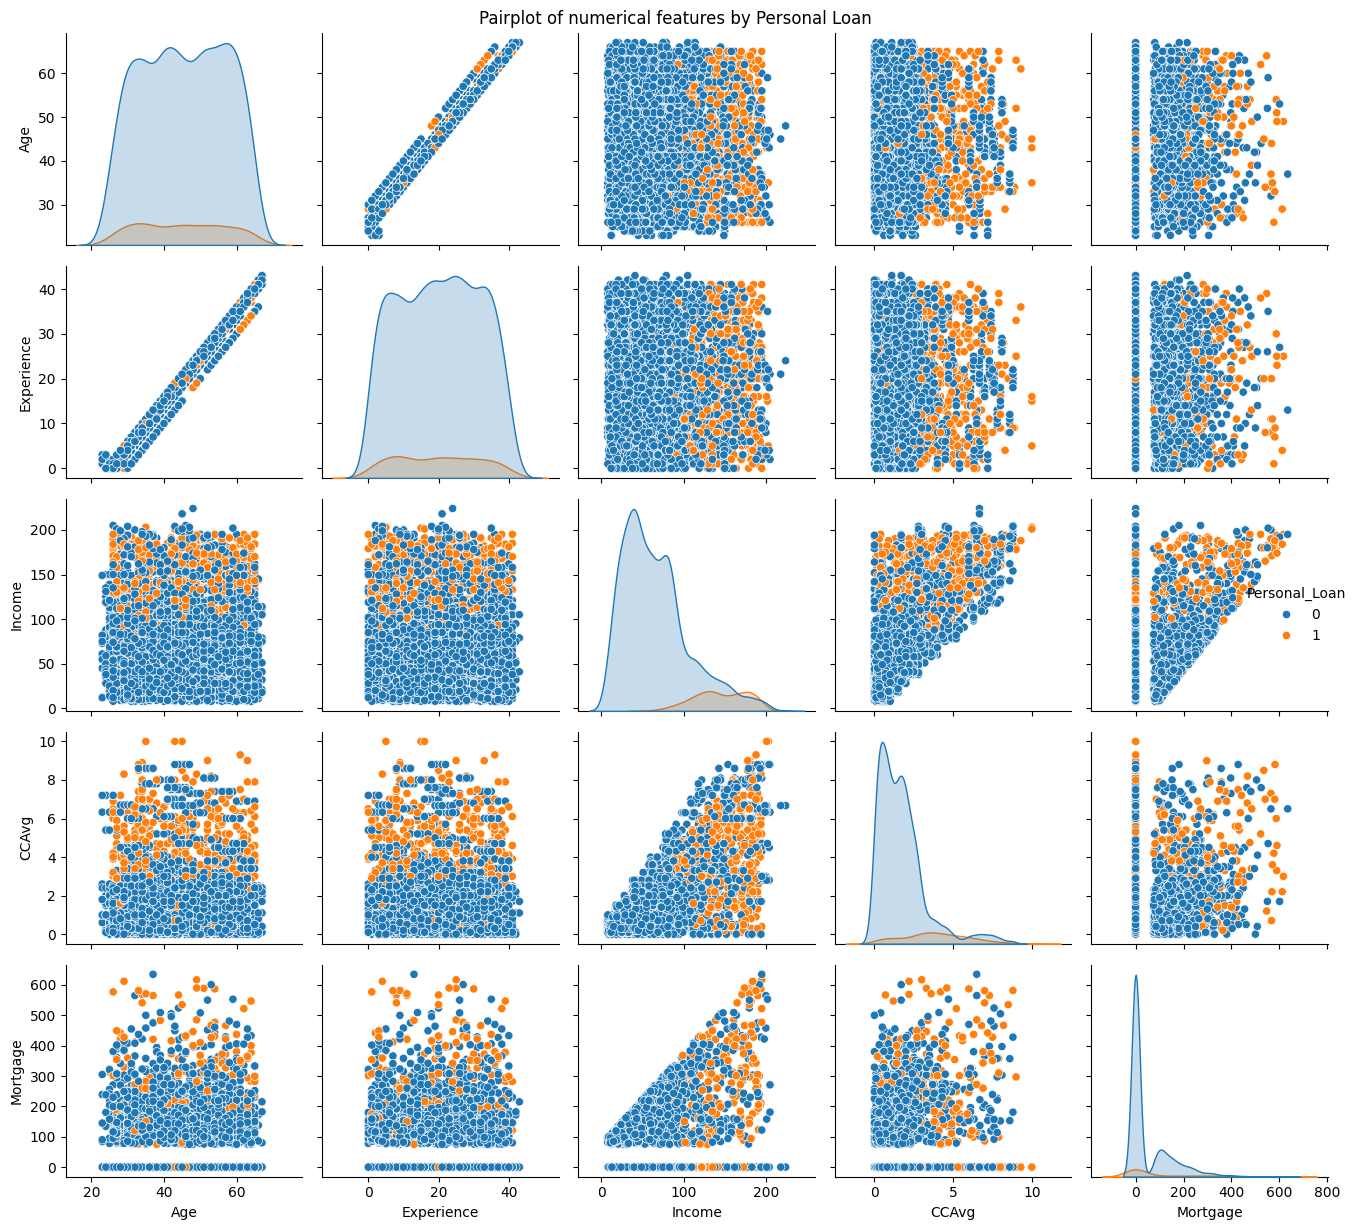

In [29]:
# pairplot
sns.pairplot(data[num_cols + ['Personal_Loan']], hue='Personal_Loan', diag_kind='kde')
plt.suptitle('Pairplot of numerical features by Personal Loan')
plt.tight_layout()
plt.show()

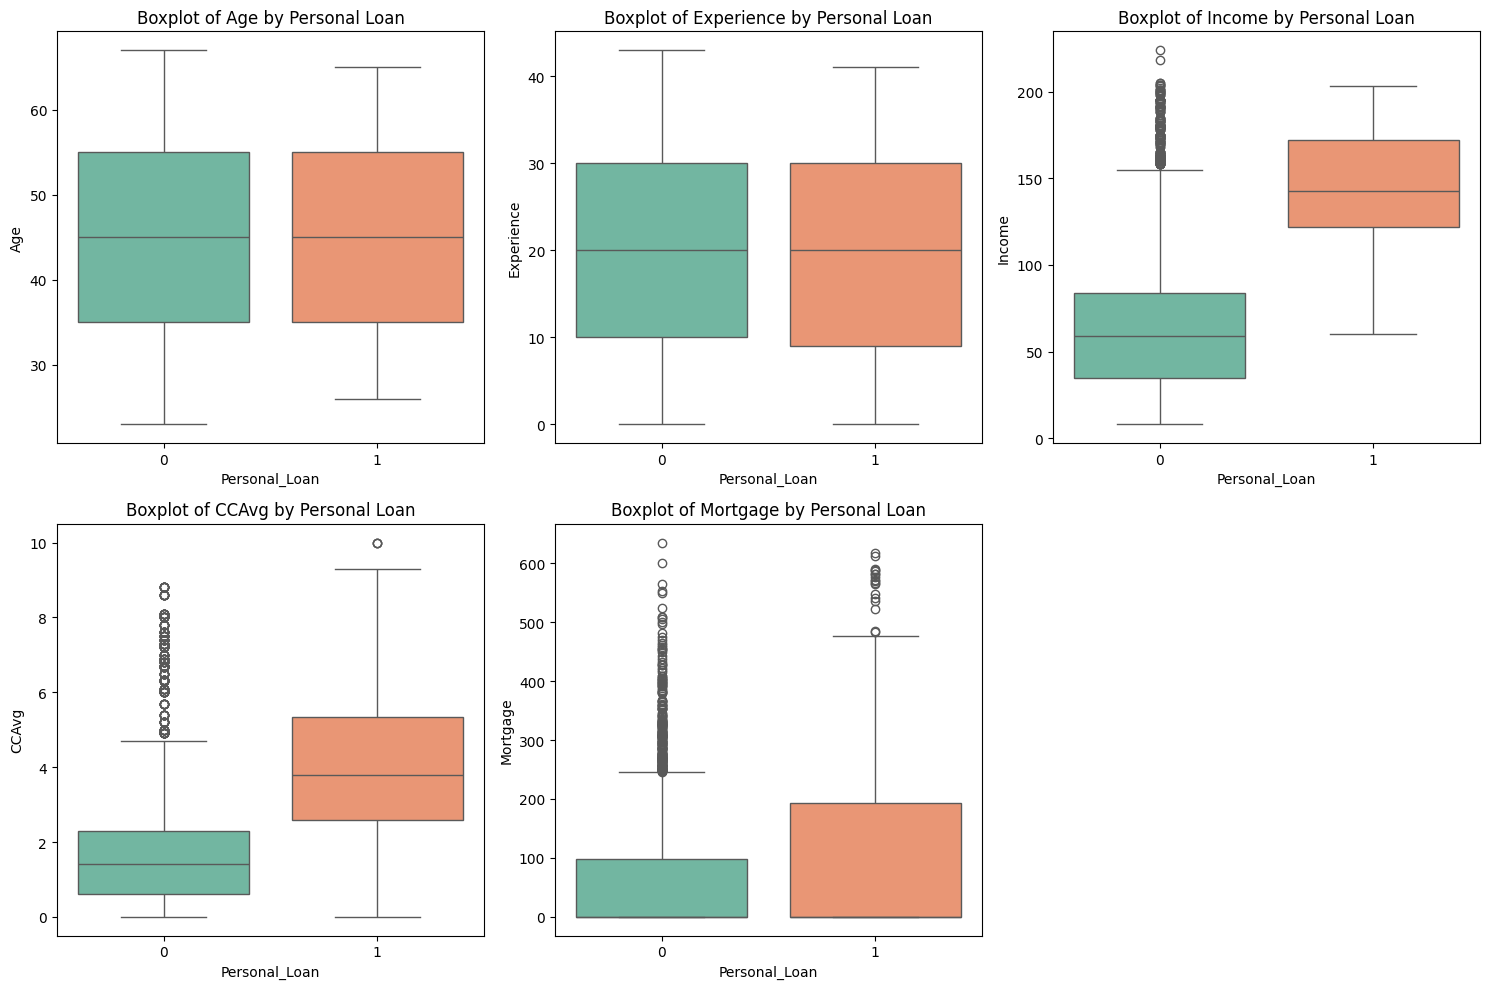

In [30]:
plt.figure(figsize=(15,10))

for i,col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(data = data, x = 'Personal_Loan', y = col, palette='Set2')
  plt.title(f'Boxplot of {col} by Personal Loan')
  plt.tight_layout()

plt.show()

In [31]:
# 25th percentile of income of the customers who accepted loan offer
data.loc[(data['Personal_Loan'] == 1)]['Income'].quantile(0.25)

122.0

In [32]:
# 25th percentile of monthly credit card spending of the customers who accepted loan offer
data.loc[(data['Personal_Loan'] == 1)]['CCAvg'].quantile(0.25)

2.6

In [33]:
# Customer(who accepted loan offer) count by mortgage status
converted_customer_no_mortgage = data.loc[(data['Mortgage'] == 0) & (data['Personal_Loan'] == 1)]['Mortgage'].count()
converted_customer_with_mortgage = data.loc[(data['Mortgage'] > 0) & (data['Personal_Loan'] == 1)]['Mortgage'].count()
pd.DataFrame([converted_customer_no_mortgage, converted_customer_with_mortgage], index = ['No Mortgage', 'With Mortgage'], columns = ['Count'])

,Count
No Mortgage,312
With Mortgage,168


In [34]:
# 25th precentile of mortgage debt of the customers who accepted loan offer
data.loc[(data['Mortgage'] > 0) & (data['Personal_Loan'] == 1)]['Mortgage'].quantile(0.25)

174.0

**Multivariate analysis:** (Categorical feature vs `Personal_Loan`)

In [42]:
def stacked_barplot(data, predictor, target):
  denorm_tab = pd.crosstab(data[predictor], data[target])
  print(f'\033[1mCrosstab of {predictor} vs {target}\033[0m')
  print(denorm_tab)
  norm_tab = pd.crosstab(data[predictor], data[target], normalize='index')
  norm_tab.plot(kind='bar', stacked=True)
  plt.title(f'Stacked Barplot of {predictor} by {target}')
  plt.xlabel(predictor)
  plt.ylabel('Percentage')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.tight_layout()
  plt.show()

Crosstab of Family vs Personal_Loan
Personal_Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134


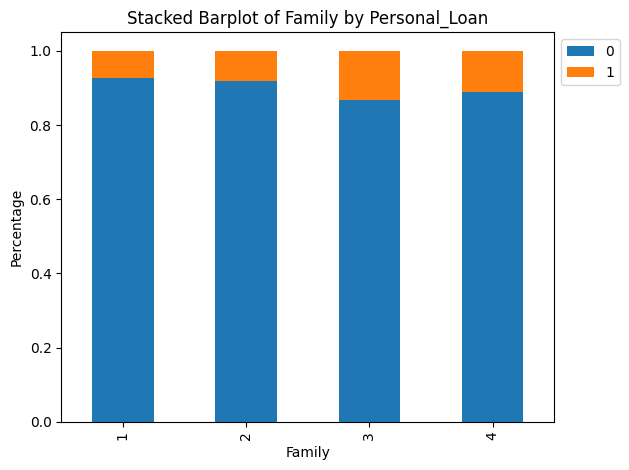


Crosstab of Education vs Personal_Loan
Personal_Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


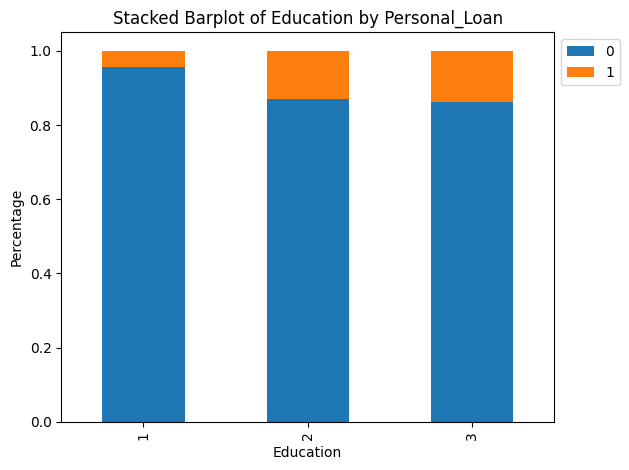


Crosstab of Securities_Account vs Personal_Loan
Personal_Loan          0    1
Securities_Account           
0                   4058  420
1                    462   60


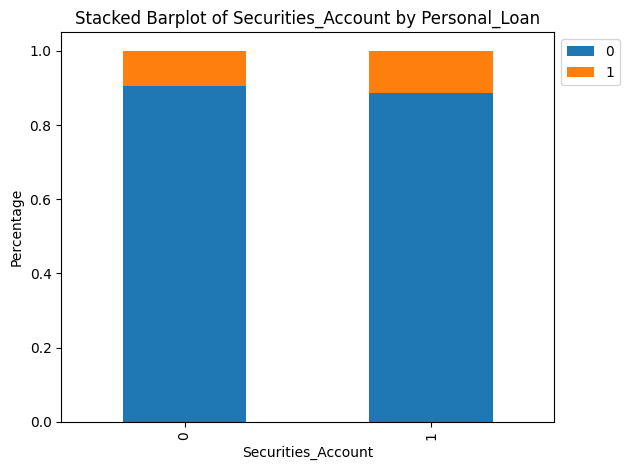


Crosstab of CD_Account vs Personal_Loan
Personal_Loan     0    1
CD_Account              
0              4358  340
1               162  140


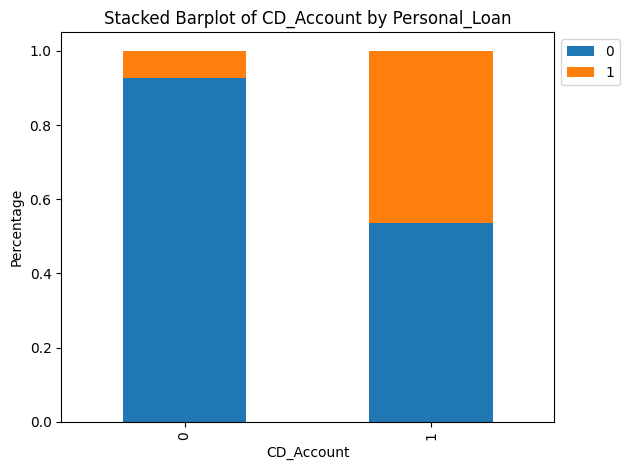


Crosstab of Online vs Personal_Loan
Personal_Loan     0    1
Online                  
0              1827  189
1              2693  291


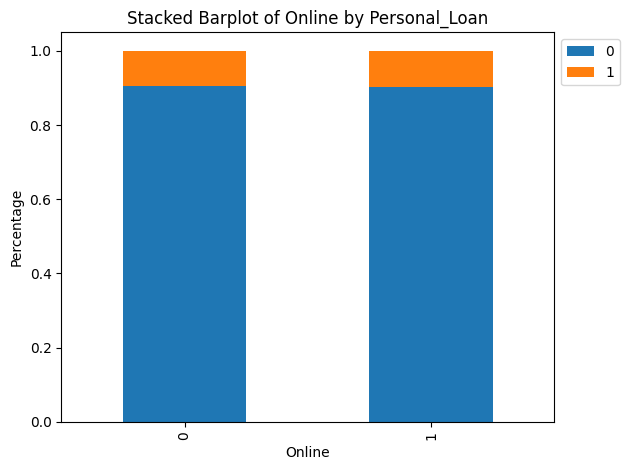


Crosstab of CreditCard vs Personal_Loan
Personal_Loan     0    1
CreditCard              
0              3193  337
1              1327  143


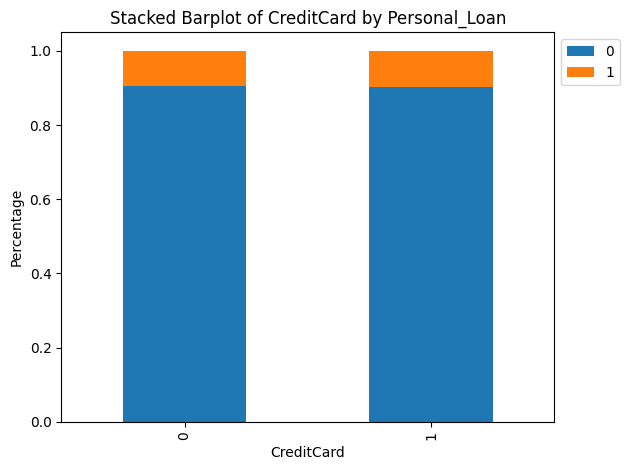

In [44]:
for col in cat_cols:
  if (col != 'ZIPCode') and (col != 'Personal_Loan'):
    stacked_barplot(data, col, 'Personal_Loan')
    print()

**Chi-square test**

#### Observations
* There is a strong positive correlation between experience and age. There is also a positive correlation between income and average monthly credit card spending.
* From the pair plot and the box plot of numerical features against `Personal_Loan` we observe the following:<br />
  * Customers who accepted loan offer, 75% of them have annual income \\$122k or more
  * Customers who accepted loan offer, 75% of them have credit card spending around \\$2.6k or more
  * Customers who accepted loan offer, 312 of them have no mortgage compared to only 168 of them have mortage.Customers with mortgage who accepted loan offer 75% of them have mortgage debt of \\$174k or more
* Customers who have certificate of deposit (CD) account with the bank, 46% of them  have accepted the loan offer.
* Customers with family size 3 and 4 have accepted the offer more than the customers of family size 1 and 2.
* Customers with graduate level or advanced/professional level education accepted the loan offer more compared to customers with undergraduate level.





## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___